In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data=pd.read_csv("/home/akarshi/Project/Codsoft/CreditCard/fraudTrain.csv")

In [3]:
test_data=pd.read_csv("/home/akarshi/Project/Codsoft/CreditCard/fraudTest.csv")

In [4]:
train_data = train_data[:500]
test_data = test_data[:500]
print(train_data.shape)
print(test_data.shape)


(500, 23)
(500, 23)


In [5]:
combined_data=pd.concat([train_data,test_data],axis=0)

In [6]:
combined_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2020-06-21 15:04:12,3501365119557234,"fraud_Torp, Muller and Borer",health_fitness,36.63,Danielle,Allen,F,87198 Macias Drive Suite 389,...,32.2740,-104.0914,1925,Educational psychologist,1952-05-26,8a5da7898d9867bdbd41744b175b430a,1371827052,32.691699,-104.683031,0
496,496,2020-06-21 15:04:15,2720433095629877,fraud_Sporer-Keebler,personal_care,4.70,Mark,Wood,M,854 Walker Dale Suite 488,...,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,f2f8dcb3b3c13461de92ef089b103f21,1371827055,44.445912,-69.845862,0
497,497,2020-06-21 15:04:53,180046765320457,"fraud_Becker, Harris and Harvey",personal_care,6.55,Jared,Camacho,M,4257 Perez Mall,...,40.8027,-81.3739,192805,Building control surveyor,1963-06-30,c2e2ec42a1d98fc4f6c22ba9d397cf71,1371827093,41.513059,-82.008669,0
498,498,2020-06-21 15:05:09,4988304376504,fraud_Bahringer Group,health_fitness,96.05,William,Thompson,M,977 Rita Grove Apt. 000,...,41.4575,-74.1659,2258,Building surveyor,1937-03-17,42ecebde5132bfbe924ce88057ec27be,1371827109,41.399449,-73.853894,0


In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   trans_date_trans_time  1000 non-null   object 
 2   cc_num                 1000 non-null   int64  
 3   merchant               1000 non-null   object 
 4   category               1000 non-null   object 
 5   amt                    1000 non-null   float64
 6   first                  1000 non-null   object 
 7   last                   1000 non-null   object 
 8   gender                 1000 non-null   object 
 9   street                 1000 non-null   object 
 10  city                   1000 non-null   object 
 11  state                  1000 non-null   object 
 12  zip                    1000 non-null   int64  
 13  lat                    1000 non-null   float64
 14  long                   1000 non-null   float64
 15  city_pop  

In [8]:
combined_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
combined_data['is_fraud'].value_counts()

is_fraud
0    1000
Name: count, dtype: int64

is_fraud
0    100.0
Name: is_fraud, dtype: float64


<Axes: ylabel='is_fraud'>

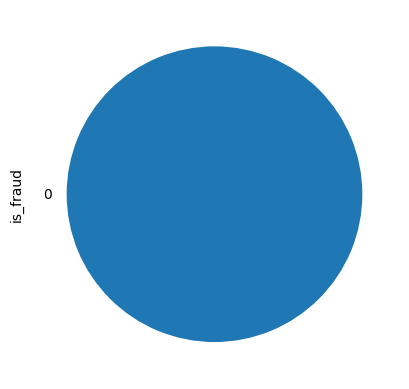

In [14]:
print((combined_data.groupby('is_fraud')['is_fraud'].count()/combined_data['is_fraud'].count())*100)
((combined_data.groupby('is_fraud')['is_fraud'].count()/combined_data['is_fraud'].count())*100).plot.pie()

In [16]:
legit = combined_data[combined_data.is_fraud == 0]
fraud = combined_data[combined_data.is_fraud==1]
legit.amt.describe()

count    1000.000000
mean       67.221970
std       106.975179
min         1.010000
25%         9.697500
50%        49.510000
75%        81.797500
max      1881.530000
Name: amt, dtype: float64

In [17]:
fraud.amt.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: amt, dtype: float64

In [18]:
combined_data.groupby('is_fraud').describe()

Unnamed: 0                                                         
              count   mean         std  min     25%    50%     75%    max   
is_fraud                                                                    
0            1000.0  249.5  144.409501  0.0  124.75  249.5  374.25  499.0  \

          cc_num                ...  merch_lat            merch_long   
           count          mean  ...        75%        max      count   
is_fraud                        ...                                    
0         1000.0  5.051365e+17  ...  41.785606  65.023497     1000.0  \

                                                                             
               mean        std         min       25%        50%        75%   
is_fraud                                                                     
0        -89.954004  13.953958 -166.148374 -96.71927 -87.112918 -79.734695  \

                     
                max  
is_fraud             
0        -68.523008  

[1 rows x 80 columns]

In [19]:
# Prepare features and target
X = train_data.drop(['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street','city', 'state','job','trans_num', 'dob'], axis=1)
y = test_data['is_fraud']
print(X.shape)
print(y.shape)

(500, 11)
(500,)


In [21]:
# Build and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=1)

In [23]:
# Make predictions
rf_predictions = rf_classifier.predict(X)

In [24]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y, rf_predictions))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Random Forest Confusion Matrix:
[[500]]
